In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [39]:
from sklearn.datasets import load_iris
data = load_iris()

In [40]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [42]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
df['target'] = data.target

In [44]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [45]:
x = df.drop('target',axis = 1)
y = df['target']

In [46]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.33,random_state=1)

In [50]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
117,7.7,3.8,6.7,2.2
139,6.9,3.1,5.4,2.1
107,7.3,2.9,6.3,1.8
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [51]:
y_test

39     0
36     0
117    2
139    2
107    2
      ..
133    2
137    2
72     1
140    2
37     0
Name: target, Length: 100, dtype: int32

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dtr_model = DecisionTreeClassifier()

In [54]:
dtr_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred = dtr_model.predict(x_test)

In [56]:
y_pred

array([0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2,
       1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0])

In [57]:
from sklearn.metrics import r2_score,accuracy_score

In [58]:
r2_score(y_test,y_pred)

0.912929908576404

In [59]:
accuracy_score(y_test,y_pred)

0.94

### Post-prunning

In [60]:
from sklearn import tree

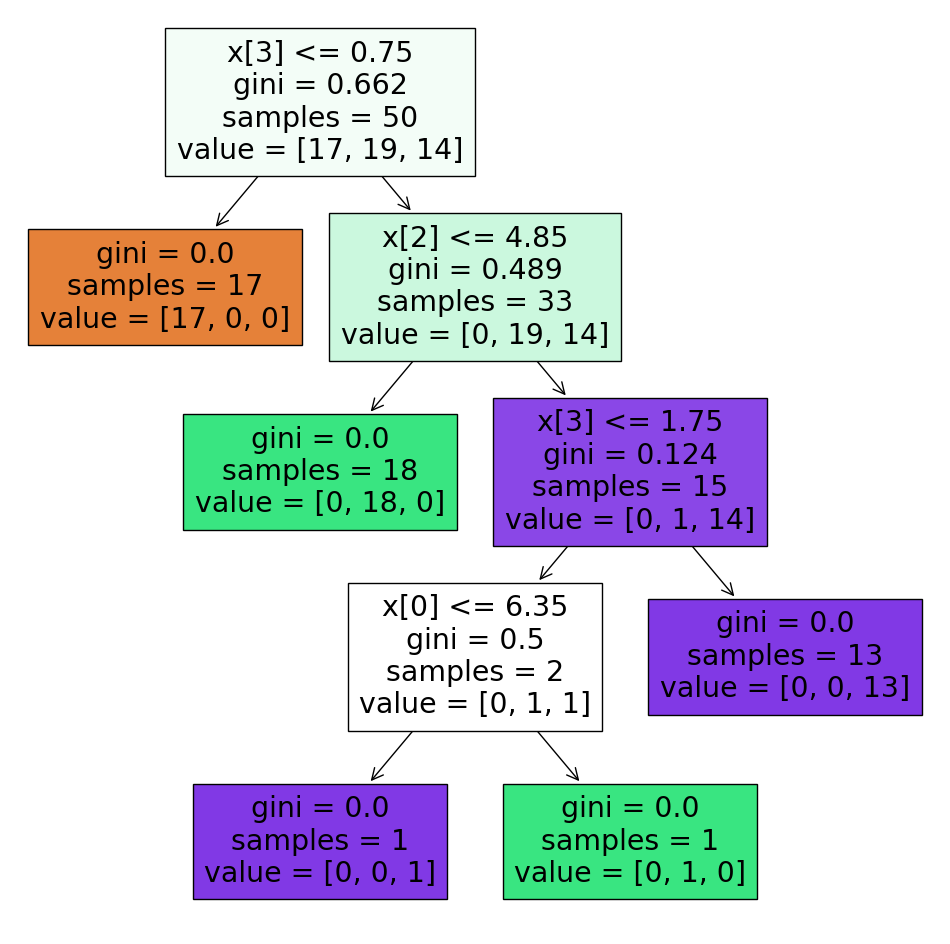

In [61]:
plt.figure(figsize=(12,12))
tree.plot_tree(dtr_model,filled = True)
plt.show()

## Pree Pruning

In [62]:
parameter = {'criterion':['gini','entropy','log_loss'],
             'max_depth':[1,2,3,4,6,8],
             'splitter':['best','random'],
             'max_features':['sqrt','log2']
             }

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
clf = DecisionTreeClassifier()

In [65]:
clf

DecisionTreeClassifier()

In [66]:
model = GridSearchCV(clf,param_grid=parameter,cv=5,scoring="accuracy")

In [67]:
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [68]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [69]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [70]:
model.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='log2')

In [71]:
model.best_score_

0.9800000000000001

In [72]:
y_pred2 = model.predict(x_test)

In [73]:
r2_score(y_test,y_pred2)

0.8984182266724713